In [1]:
import open3d as o3d
import numpy as np
import os
import sys 
import copy

sys.path.append('..')
import open3d_tutorial as o3dtut
o3dtut.interactive = not "CI" in os.environ

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
pcd = o3d.io.read_point_cloud("ps2/1.ply")
print(np.asarray(pcd.points))

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 ...
 [58.  5. 20.]
 [58.  6. 20.]
 [58.  7. 20.]]


In [3]:
print(np.asarray(pcd.colors)*255)

[[  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 ...
 [192.   0.   0.]
 [192.   0.   0.]
 [192.   0.   0.]]


**Define segment labels provided for each color in the point clouds to simplify visual review of the model to classify objects by assigning specific colours**



In [4]:
label_to_rgb_mapping={ 'wall':[192,192,128], 'floor':[128,0,0], 'ceiling':[0,128,0], 'windowpane':[128,128,0], 
                       'person':[0,0,128], 'door':[128,0,128], 'lamp':[128,128,128], 'signboard':[64,0,0], 'counter':[192,0,0],
                       'storage':[64,128,0], 'screen':[192,128,0], 'beverage_machine':[64,0,128], 'kitchen':[192,0,128], 
                       'products':[0,128,128], 'pos_machine': [64,64,128], 'others':[64,128,128], 'rollergrill': [64,64,64] }

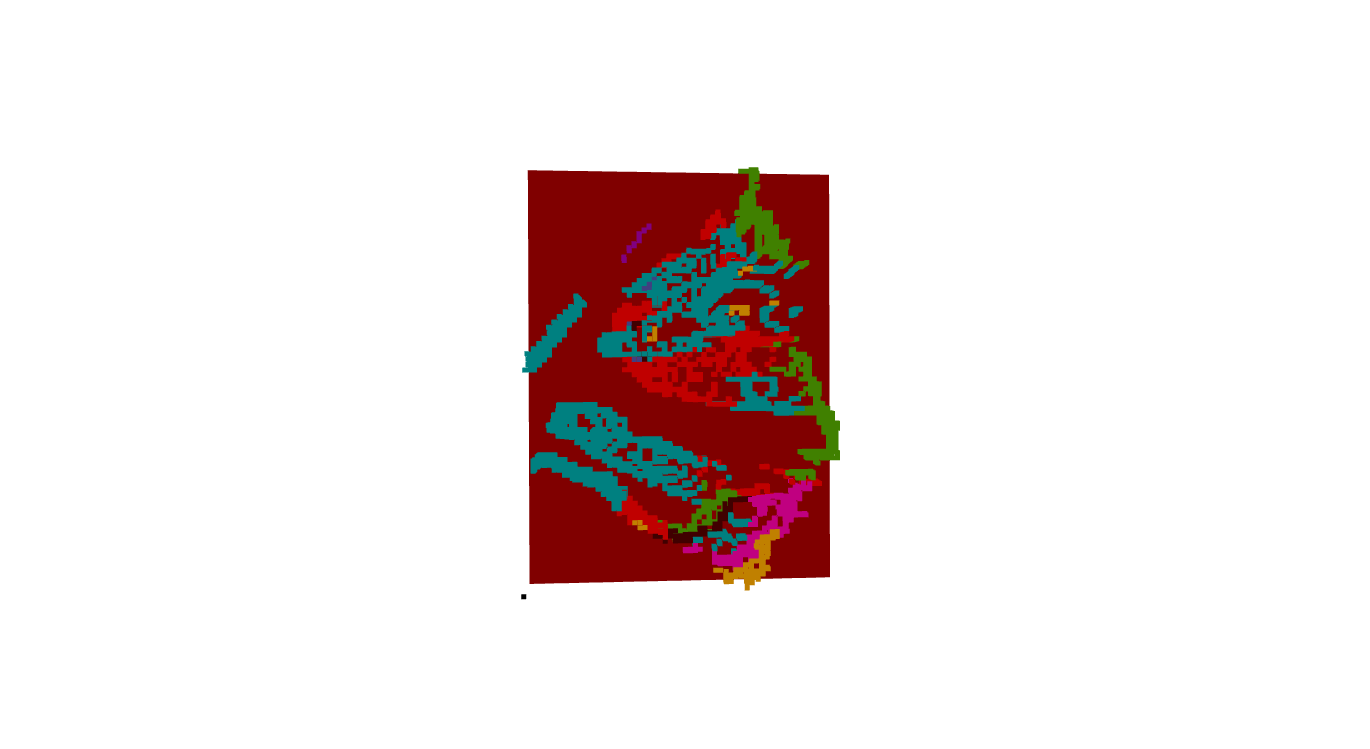

In [5]:
o3d.visualization.draw_geometries([pcd])

**Copy the color component of each point in the point cloud to a new numpy array and multiply with 255** 

In [6]:
colors = np.array(pcd.colors)*255

In [7]:
colors

array([[  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       ...,
       [192.,   0.,   0.],
       [192.,   0.,   0.],
       [192.,   0.,   0.]])

In [8]:
len(colors)

17343

**Define a function to return indices of all points in the point cloud corresponding to a specific label. Function takes the point cloud and color value of label as arguments**

In [9]:
def find_indices(array, element):
    pos = []
    for i in range(len(array)):
        if (array[i][0] == element[0] and colors[i][1] == element[1] and colors[i][2] == element[2]):
            pos.append(i)
    return pos        

**For a given point cloud, create separate point clouds for each segment label via extraction of indices**

In [11]:
# wall = pcd.select_by_index(find_indices(colors, label_to_rgb_mapping['wall'])) 
floor = pcd.select_by_index(find_indices(colors, label_to_rgb_mapping['floor']))
# ceiling = pcd.select_by_index(find_indices(colors, label_to_rgb_mapping['ceiling']))
# windowpane = pcd.select_by_index(find_indices(colors, label_to_rgb_mapping['windowpane']))
# person = pcd.select_by_index(find_indices(colors, label_to_rgb_mapping['person']))
door = pcd.select_by_index(find_indices(colors, label_to_rgb_mapping['door']))
# lamp = pcd.select_by_index(find_indices(colors, label_to_rgb_mapping['lamp']))
signboard = pcd.select_by_index(find_indices(colors, label_to_rgb_mapping['signboard']))
counter = pcd.select_by_index(find_indices(colors, label_to_rgb_mapping['counter']))
storage = pcd.select_by_index(find_indices(colors, label_to_rgb_mapping['storage']))
screen = pcd.select_by_index(find_indices(colors, label_to_rgb_mapping['screen']))
beverage_machine = pcd.select_by_index(find_indices(colors, label_to_rgb_mapping['beverage_machine']))
kitchen = pcd.select_by_index(find_indices(colors, label_to_rgb_mapping['kitchen']))
products = pcd.select_by_index(find_indices(colors, label_to_rgb_mapping['products']))
pos_machine = pcd.select_by_index(find_indices(colors, label_to_rgb_mapping['pos_machine']))
others = pcd.select_by_index(find_indices(colors, label_to_rgb_mapping['others']))
rollergrill = pcd.select_by_index(find_indices(colors, label_to_rgb_mapping['rollergrill']))

In [12]:
rollergrill

PointCloud with 0 points.

**Given below is a list of all objects/classes present in each of the 15 point clouds**
* pcd1  - floor, door, signboard, counter, storage, screen, kitchen, products, pos_machine
* pcd2  - floor, counter, storage, beverage_machine, products, rollergrill - 2
* pcd3  - floor, door, signboard, counter, storage, beverage_machine, kitchen, products
* pcd4  - floor, signboard, counter, storage, products, pos_machine
* pcd5  - floor, counter, storage, products - 1
* pcd6  - floor, counter, screen, products
* pcd7  - floor, counter, storage, beverage_machine, products, rollergrill - 2
* pcd8  - floor, signboard, counter, storage, screen, kitchen, products, pos_machine
* pcd9  - floor, counter, storage, products - 1
* pcd10 - floor, counter, storage, beverage_machine, products, rollergrill - 2
* pcd11 - floor, counter, screen, products, pos_machine
* pcd12 - floor, door, counter, storage, products, rollergrill
* pcd13 - floor, signboard, counter, storage, beverage_machine, products, rollergrill
* pcd14 - floor, door, signboard, counter, storage, beverage_machine, products, rollergrill
* pcd15 - floor, door, counter, storage, screen, products, pos_machine 

In [13]:
pcd

PointCloud with 17343 points.

In [14]:
kitchen

PointCloud with 206 points.

In [15]:
floor

PointCloud with 5208 points.

In [16]:
print(np.asarray(floor.colors)*255)

[[128.   0.   0.]
 [128.   0.   0.]
 [128.   0.   0.]
 ...
 [128.   0.   0.]
 [128.   0.   0.]
 [128.   0.   0.]]


**To visualize the point cloud, list the specific classes/objects of interest separated by commas.**

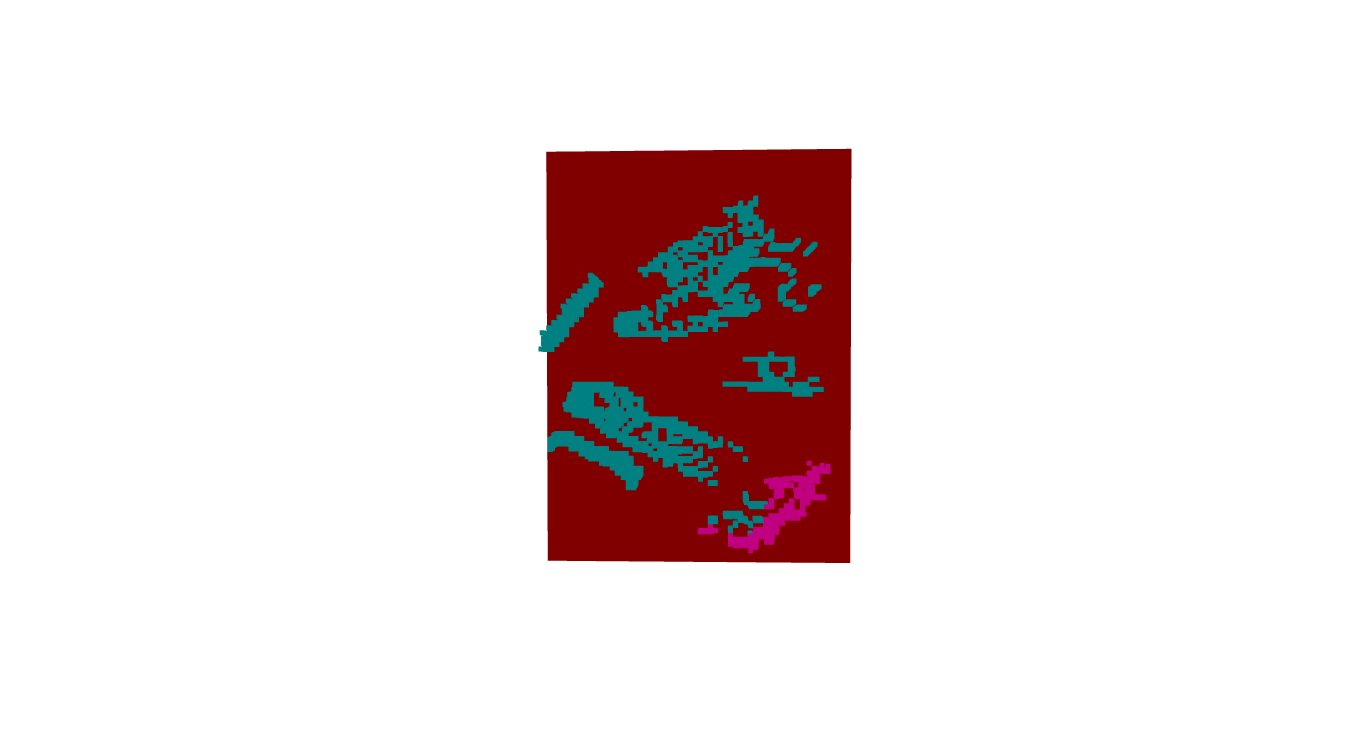

In [18]:
o3d.visualization.draw_geometries([floor,kitchen,products])

**Following is to prune the point cloud or to visualize the point cloud with exclusion of a single object/class of interest**

In [19]:
pcd_without_products = pcd.select_by_index(find_indices(colors, label_to_rgb_mapping['products']), invert=True)

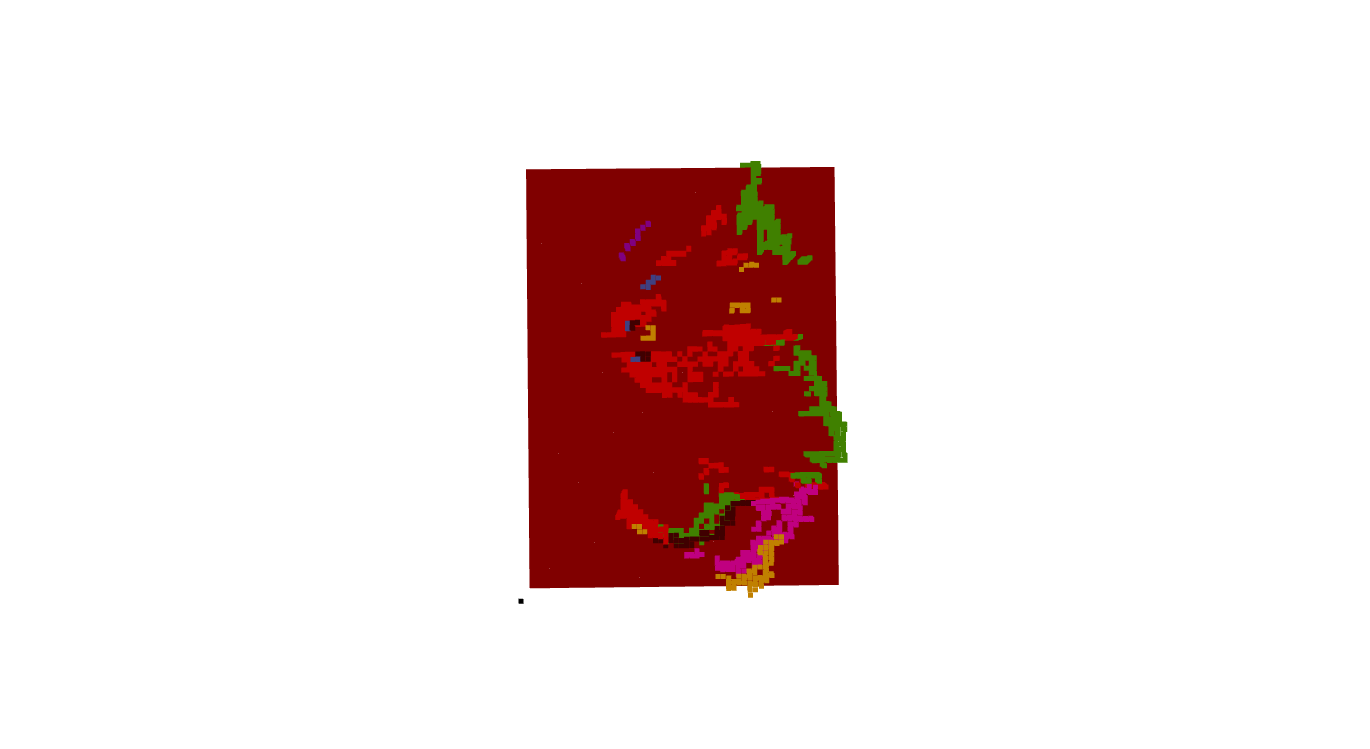

In [20]:
o3d.visualization.draw_geometries([pcd_without_products])

**From the given list of point clouds and the classes present, it is evident that some pairs comprise of the same classes and possible overlap between them.**

For example :
* pcd5 and pcd9 having classes - floor, counter, storage, products

Use Colored Point Cloud registration to align/register these potentially overlapping point clouds.


In [21]:
def draw_registration_result_original_color(source, target, transformation):
    source_temp = copy.deepcopy(source)
    source_temp.transform(transformation)
    o3d.visualization.draw_geometries([source_temp, target],
                                      zoom=0.5,
                                      front=[-0.2458, -0.8088, 0.5342],
                                      lookat=[1.7745, 2.2305, 0.9787],
                                      up=[0.3109, -0.5878, -0.7468])

1. Load two point clouds and show initial pose


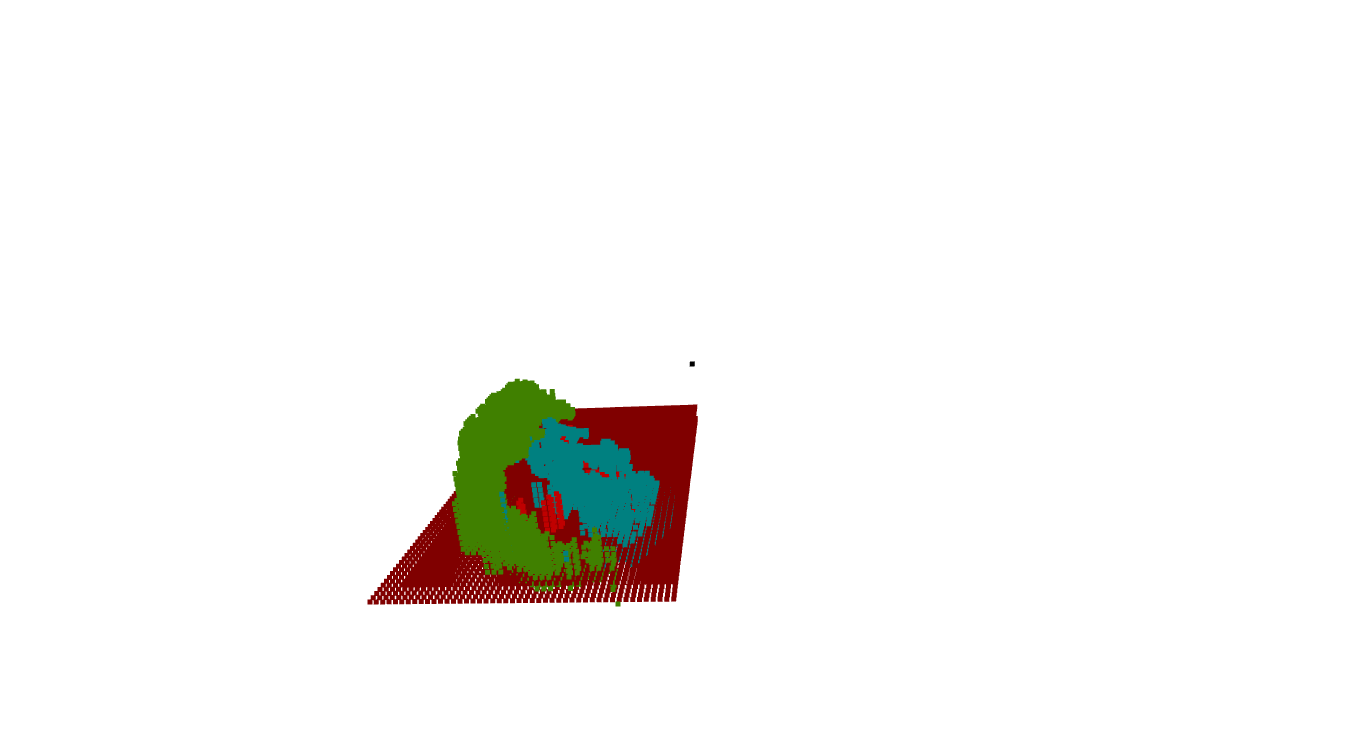

In [22]:
print("1. Load two point clouds and show initial pose")
source = o3d.io.read_point_cloud("ps2/5.ply")
target = o3d.io.read_point_cloud("ps2/9.ply")

# draw initial alignment
current_transformation = np.identity(4)
draw_registration_result_original_color(source, target, current_transformation)

2. Point-to-plane ICP registration is applied on original point
   clouds to refine the alignment. Distance threshold 0.02.
RegistrationResult with fitness=4.227603e-01, inlier_rmse=0.000000e+00, and correspondence_set size of 4365
Access transformation to get result.


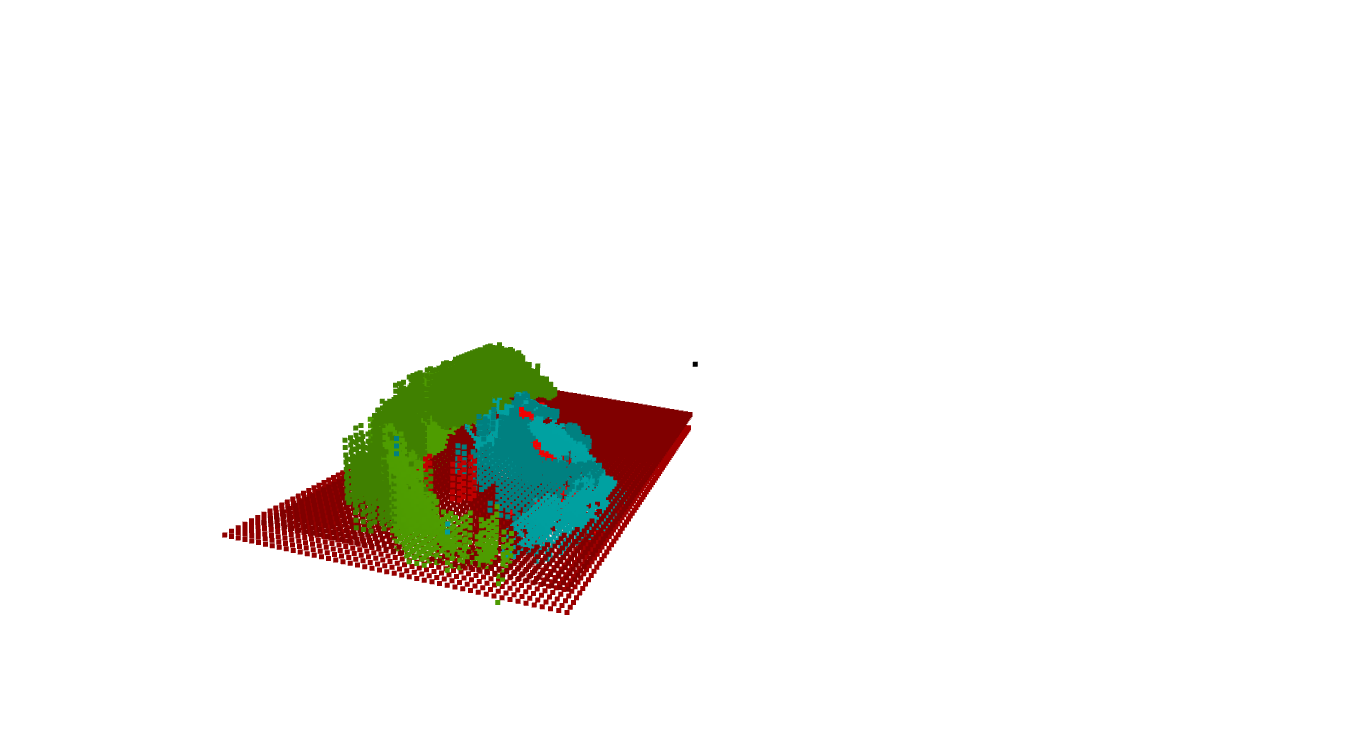

In [23]:
# point to plane ICP
current_transformation = np.identity(4)
print("2. Point-to-plane ICP registration is applied on original point")
print("   clouds to refine the alignment. Distance threshold 0.02.")
target.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
result_icp = o3d.pipelines.registration.registration_icp(
    source, target, 0.02, current_transformation,
    o3d.pipelines.registration.TransformationEstimationPointToPlane())
print(result_icp)
draw_registration_result_original_color(source, target,
                                        result_icp.transformation)

3. Colored point cloud registration
[50, 0.04, 0]
3-2. Estimate normal.
3-3. Applying colored point cloud registration
RegistrationResult with fitness=4.227603e-01, inlier_rmse=0.000000e+00, and correspondence_set size of 4365
Access transformation to get result.
[30, 0.02, 1]
3-2. Estimate normal.
3-3. Applying colored point cloud registration
RegistrationResult with fitness=4.227603e-01, inlier_rmse=0.000000e+00, and correspondence_set size of 4365
Access transformation to get result.
[14, 0.01, 2]
3-2. Estimate normal.
3-3. Applying colored point cloud registration
RegistrationResult with fitness=4.227603e-01, inlier_rmse=0.000000e+00, and correspondence_set size of 4365
Access transformation to get result.


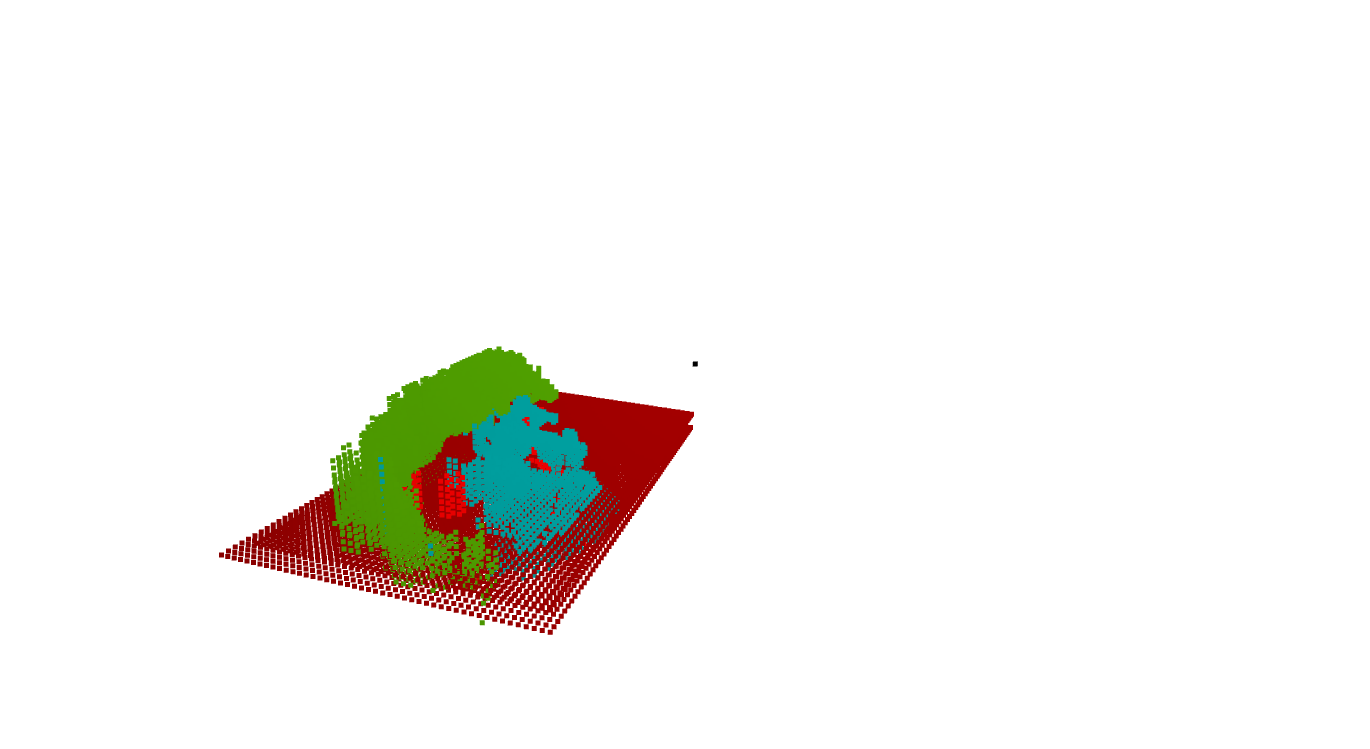

In [24]:
# colored pointcloud registration
# This is implementation of following paper
# J. Park, Q.-Y. Zhou, V. Koltun,
# Colored Point Cloud Registration Revisited, ICCV 2017
voxel_radius = [0.04, 0.02, 0.01]
max_iter = [50, 30, 14]
current_transformation = np.identity(4)
print("3. Colored point cloud registration")
for scale in range(3):
    iter = max_iter[scale]
    radius = voxel_radius[scale]
    print([iter, radius, scale])

#     print("3-1. Downsample with a voxel size %.2f" % radius)
#     source_down = source.voxel_down_sample(radius)
#     target_down = target.voxel_down_sample(radius)

    print("3-2. Estimate normal.")
    source.estimate_normals(
        o3d.geometry.KDTreeSearchParamHybrid(radius=radius * 2, max_nn=30))
    target.estimate_normals(
        o3d.geometry.KDTreeSearchParamHybrid(radius=radius * 2, max_nn=30))

    print("3-3. Applying colored point cloud registration")
    result_icp = o3d.pipelines.registration.registration_colored_icp(
        source, target, radius, current_transformation,
        o3d.pipelines.registration.TransformationEstimationForColoredICP(),
        o3d.pipelines.registration.ICPConvergenceCriteria(relative_fitness=1e-6,
                                                          relative_rmse=1e-6,
                                                          max_iteration=iter))
    current_transformation = result_icp.transformation
    print(result_icp)
draw_registration_result_original_color(source, target,
                                        result_icp.transformation)